In [1]:
import seaborn as sns

In [29]:
df=sns.load_dataset('Titanic')

In [28]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,Age_median
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0,35.0


In [5]:
### check missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
###delete the null values
df.shape

(891, 15)

In [9]:
df.dropna().shape

(182, 15)

In [10]:
## drop the column null values
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


#### imputaion missing values

<AxesSubplot:xlabel='age', ylabel='Count'>

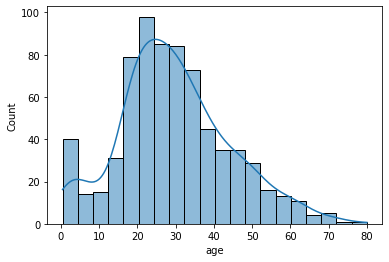

In [12]:
sns.histplot(df['age'],kde=True)

### mean value imputation (the distibution is normalized)

In [30]:
df['Age_mean']=df.age.fillna(df.age.mean())

In [31]:
df[['age','Age_mean']]

,age,Age_mean
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


## Mean imputation is work well the data is normal distrintion

### 2. Median value imputation (if missing values have outliers)

In [32]:
df['Age_median']=df.age.fillna(df.age.median())

In [33]:
df[['age','Age_median','Age_mean']]

,age,Age_median,Age_mean
0,22.0,22.0,22.000000
1,38.0,38.0,38.000000
2,26.0,26.0,26.000000
3,35.0,35.0,35.000000
4,35.0,35.0,35.000000
...,...,...,...
886,27.0,27.0,27.000000
887,19.0,19.0,19.000000
888,NaN,28.0,29.699118
889,26.0,26.0,26.000000


#### mode value imputation (only categorical value)

In [36]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
Age_mean         0
Age_median       0
dtype: int64

In [38]:
df[df['embark_town'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,Age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [39]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [42]:
df['embark_mode']=df['embark_town'].fillna(df['embark_town'].mode())

In [46]:
df[['embark_town','embark_mode']].isnull()

,embark_town,embark_mode
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
886,False,False
887,False,False
888,False,False
889,False,False


### Im-balanced data set: (the output of samples format is 9 : 1)
    - upsampling
    - down sampling

In [48]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [49]:
## CREATE MY DATAFRAME WITH IMBALANCED DATASET
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [51]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [52]:
df

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1


In [55]:
##upsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [57]:
from  sklearn.utils import resample

In [63]:
df_minority_upsample=resample(df_minority,replace=True, n_samples=len(df_majority),random_state=42)

In [64]:
df_minority_upsample.shape

(900, 3)

In [65]:
df_upsamplingdata=pd.concat([df_majority,df_minority_upsample])

In [67]:
df_upsamplingdata

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
952,1.188902,2.189189,1
965,3.919526,1.980541,1
976,2.810326,3.604614,1
942,3.621531,2.168229,1


In [68]:
df_upsamplingdata['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

#### Down samplling

In [71]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [72]:
df_majority_upsample=resample(df_majority,replace=False, n_samples=len(df_minority),random_state=42)

In [74]:
df_majority_upsample.shape

(100, 3)

In [75]:
df_downsamplingdata=pd.concat([df_minority,df_majority_upsample])

In [76]:
df_downsamplingdata

,feature_1,feature_2,target
900,1.699768,2.139033,1
901,1.367739,2.025577,1
902,1.795683,1.803557,1
903,2.213696,3.312255,1
904,3.033878,3.187417,1
...,...,...,...
398,-0.168426,0.553775,0
76,-0.403366,0.081491,0
196,-0.269293,0.611238,0
631,-0.295829,0.671673,0


#### 3.SMOTE (synthtice minority oversampling Technique)

In [78]:
from sklearn.datasets import make_classification

In [82]:
X,y=make_classification(n_samples=100,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=12,n_redundant=0)

In [84]:
import pandas as pd
import numpy as np

In [87]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
finaldf=pd.concat([df1,df2],axis=1)

In [89]:
finaldf.head()

,f1,f2,target
0,-1.385899,-0.605329,0
1,-1.102477,-0.901812,0
2,-0.186238,-1.797324,0
3,-0.712424,-1.273854,0
4,-2.395590,0.301762,0


In [91]:
finaldf['target'].value_counts()

0    92
1     8
Name: target, dtype: int64

In [92]:
import matplotlib.pyplot as plt

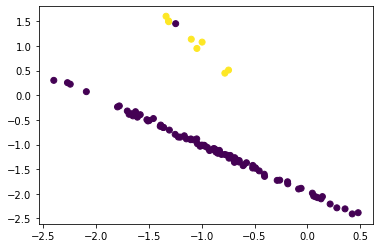

In [96]:
plt.scatter(finaldf.f1,finaldf.f2,c=finaldf.target)

In [ ]:
pip install imblearn

In [100]:
from imblearn.over_sampling import SMOTE

In [102]:
Oversample=SMOTE()

In [104]:
X,y=Oversample.fit_resample(finaldf[['f1','f2']],finaldf.target)

In [108]:
X

,f1,f2
0,-1.385899,-0.605329
1,-1.102477,-0.901812
2,-0.186238,-1.797324
3,-0.712424,-1.273854
4,-2.395590,0.301762
...,...,...
179,-1.087735,1.102345
180,-1.138031,1.204205
181,-1.334091,1.596049
182,-1.093434,1.134382


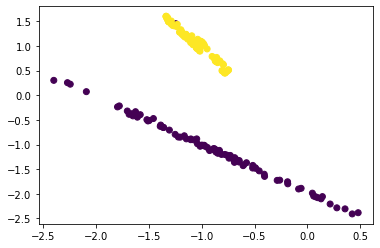

In [109]:
plt.scatter(X['f1'],X['f2'],c=y)

### topic-4 Data Interpolation

### Liner interpolation

In [3]:
import numpy as np
import matplotlib.pyplot as plt

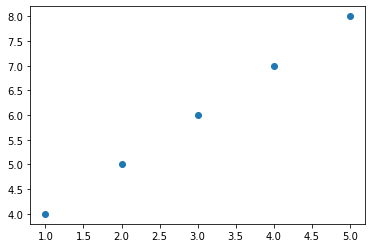

In [11]:
x=np.array([1,2,3,4,5])
y=np.array([4,5,6,7,8])

plt.scatter(x,y)

In [9]:
## interploat data with liner regression
x_new=np.linspace(1,5,10)
y_interp=np.interp(x_new,x,y)

In [10]:
y_interp

array([4.        , 4.44444444, 4.88888889, 5.33333333, 5.77777778,
       6.22222222, 6.66666667, 7.11111111, 7.55555556, 8.        ])

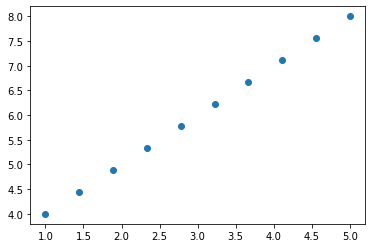

In [12]:
plt.scatter(x_new,y_interp)

#### 2.cubic interploation with scipy

In [13]:
x=np.array([1,2,3,4,5])
y=np.array([1,8,17,64,125])

In [14]:
from scipy.interpolate import interp1d

In [16]:
## create a cubic function
f=interp1d(x,y,kind='cubic')

In [17]:
x_new=np.linspace(1,5,10)
y_interplot=f(x_new)

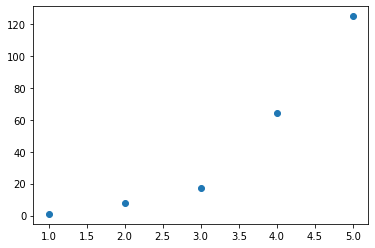

In [18]:
plt.scatter(x,y)

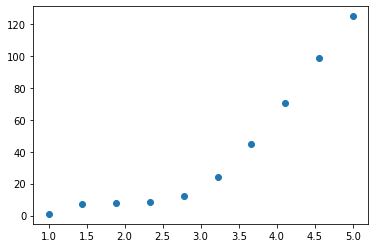

In [19]:
plt.scatter(x_new,y_interplot)

#### Polynominal interpolation

In [20]:
x=np.array([1,2,3,4,5])
y=np.array([1,8,17,64,125])

In [21]:
p=np.polyfit(x,y,2)

In [23]:
x_new=np.linspace(1,5,10)
y_interport=np.polyval(p,x_new)

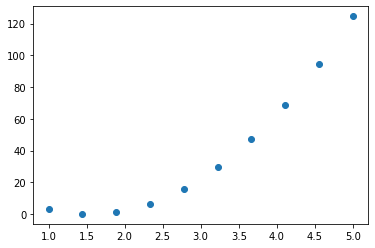

In [24]:
plt.scatter(x_new,y_interport)

#### Outliers: 5 Number summary and Box plot

- minimin, Maximux, mdeian, Q1, Q3

In [1]:
import  numpy as np

In [5]:
lst_marks=[45,32,67,89,67,45,98,70,99,58,35]
minimu,Q1,meadian,Q3,Maximum=np.quantile(lst_marks,[0,0.25,0.50,0.75,1.0])
minimu,Q1,meadian,Q3,Maximum

(32.0, 45.0, 67.0, 79.5, 99.0)

In [7]:
iqr=Q3-Q1
iqr

34.5

In [9]:
lowefense=Q1-1.5*(iqr)
higerfense=Q3-1.5*(iqr)

In [10]:
lowefense,higerfense

(-6.75, 27.75)

In [11]:
import seaborn as sns

C:\Users\MARI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

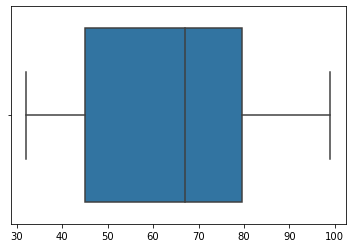

In [12]:
sns.boxplot(lst_marks)

In [16]:
lst_marks=[-100,-200,45,32,67,89,67,45,98,70,99,58,35,150,200,250]

C:\Users\MARI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

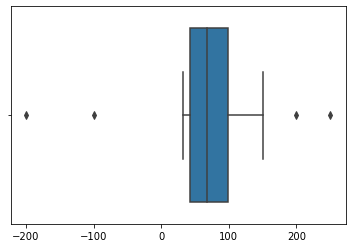

In [17]:
sns.boxplot(lst_marks)